**Çalışmayı beğenirseniz oylamayı unutmayın  ^____^ .**


<a class="anchor" id="0."></a>
**İçindekiler**

* [1. Çalışmanın Özeti](#1.)
* [2. Veri Seti Hakkında Bağlamsal Değerlendirme](#2.)
* [3. Veri Seri Hakkında Teknik Değerlendirme](#3.)
* *  [3.1.  Tanımlayıcı İstatistik(Descriptive Statistics)](#3e1.)
* [4. Çizdirme Fonksiyonu:draw_multivarient_plot](#4.)
* [5. Altı Kalite Seviyesi İçin Kalite-Özellik İlişkileri](#5.)
* * [5.1. Box Plot](#5.1.)
* * [5.2. Violin Plot](#5.2.)
* * [5.3. Point Plot](#5.3.)
* * [5.4. Bar Plot](#5.4.)
* [6. Yardımcı Fonksiyonlar:get_models(), cross_validation_scores_for_various_ml_models(X_cv, y_cv)](#6.)
* [7. Altı Kalite Sevitesi İçin Çapraz Doğrulama Sonuçları](#7.)
* [8. Yardımcı Fonksiyon:SVM_GridSearch(X_train, X_test, y_train, y_test)](#8.)
* [9. Altı Kalite Seviyesi İçin GridSearch Sonucu](#9.)
* [10. Kalite Sayısını 3'e Düşürülmesi](#10.)
* [11. Üç Kalite Seviyesi İçin Kalite-Özellik İlişkileri](#11.)
* *  [11.1. Box Plot](#11.1.)
* *  [11.2. Violin Plot](#11.2.)
* * [11.3. Point Plot](#11.3.)
* * [11.4. Bar Plot](#11.4.)
* [12. Üç Kalite Sevitesi İçin Çapraz Doğrulama Sonuçları](#12.)
* [13. Üç Kalite Seviyesi İçin GridSearch Sonucu](#13.)

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="1."></a>**1. Çalışmanın Özeti** <=====>
* Veri Serinin Yüklenmesi
* Veri Setinin Görselleştirilmesi
* Ölçeklendirme
* En İyi Sınıflandırıcının Bulunması
* En İyi Sınıfılandırıcının Optimizasyonu


In [1]:
# Gerekli Kütüphaneleri Yüklenmesi Yapılıyor
import numpy as np # linear algebra
import pandas as pd # veri işleme

#Görselleştirme Kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

#Makine öğrenmesi gereçleri
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Makine öğrenmesi algoritmaları
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Performans metrikleri
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import imblearn
from imblearn.over_sampling import SMOTE
#Sistem kütüphaneleri
import os
import warnings

# Çıktılarda karmaşıklığa sebep olduğu için uyarılırı iptal ediyoruz
warnings.filterwarnings("ignore")
print(os.listdir("../input"))

['winequality-red.csv']


/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="2."></a>**2. Veri Seti Hakkında Bağlamsal Değerlendirme**


Veri seti, Portekiz "Vinho Verde" şarabının kırmızı ve beyaz çeşitleri ile ilgilidir. Daha fazla bilgi için Cortez ve diğ., (Modeling wine preferences by data mining from physicochemical properties, 2009) çalışmaya bakabilirsiniz.  Gizlilik ve lojistik konulardan dolayı, sadece fizikokimyasal (girişler) ve duyusal (çıktı) değişkenler mevcuttur (örneğin üzüm türleri, şarap markası, şarap satış fiyatı vb. hakkında veri yoktur).

Bu veri seti, sınıflandırma veya regresyon görevleri için kullanılabilir. Sınıflar sıralıdır ve dengesiz dağılıma sahitir (Örneğin; mükemmel veya kötü olanlardan çok daha normal şarap verileri vardır).

**içerik**
Giriş değişkenleri (fizikokimyasal testlere dayanarak):
1. sabit asit
1. uçucu asitliği
1. sitrik asit
1. artık şeker
1. klorürler
1. serbest sülfür dioksit
1. toplam sülfür dioksit
1. yoğunluk
1. pH
1. sülfatlar
1. alkol
1. Çıkış değişkeni (duyusal verilere göre): kalite (0 ile 10 arasında puan). Var olan kalite puanlar;3, 4, 5, 6, 7, 8.



In [2]:
#Veri setinin yüklemesi yapılıyor 
dataset=pd.read_csv("../input/winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#Kaç farklı kalite puanı olduğunu öğrenelim
print("Kalite puanları:",dataset['quality'].unique())

Kalite puanları: [5 6 7 4 8 3]


In [5]:
#Herbir kalite puanından kaçtane örnek olduğunu görelim
print(dataset['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


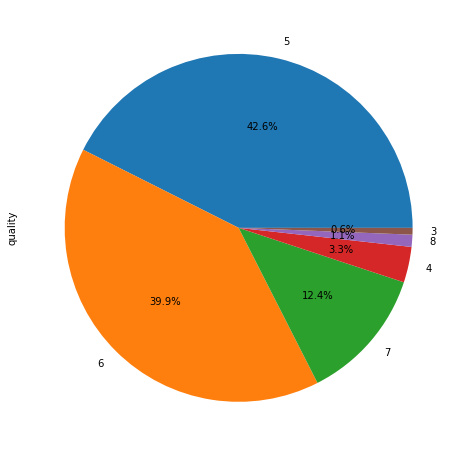

In [6]:
#kalite puanlarını pie grafikle göstrelim
plt.figure(1, figsize=(8,8))
dataset['quality'].value_counts().plot.pie(autopct="%1.1f%%")

Veri setindeki örneklerin sınıf dağılımı dengesizdir. Dengesiz sınıf dağılımı, makine öğrenmesi modelleri için istenmeyen bir durumdur. Veri seti eğitim ve test için ayrılırken bu dengisizliği dikkate alarak 'stratify' özelliği kullanılacaktır. 

Dengesiz sınıf dağılımıyla başaçıkmak için az örneğe sahip sınıflar çoğaltılarak çok örneğe sahip sınıflarla aynı örnek sayısına sahip olur. Çalışmaya bu konu eklenmemiştir. Fırsatım olduğunda dengesiz sınıflarla başaçıkmak için geliştirilen yöntemleri eklemeye çalışacağım.

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="3."></a>**3. Veri Seri Hakkında Teknik Değerlendirme**  

1. Veri setinde toplam 1599 örnek yer almaktadır
1. Veri setinde eksik bilgi yoktur.
1. Veri setindeki tüm özellikler sayısayl değer içermektedir
1. Şarapların için beş ayrı kalite seviyesi belirlenmiştir; 3, 4, 5, 6, 7, 8. En düşük değer 3 ve en yüksek değer 8'dir. 

[İçindekiler Menüsüne Git](#0.)

<a class="anchor" id="3e1."></a>**3.1. Tanımlayıcı İstatistik(Descriptive Statistics)** <=====>

Tanımlayıcı istatistik, veri kümesindeki özelliklerin kantitatif tanımlamasını, özetlemesini veya analizini yapar. Çıkarımsal istatistik, veri setini temsil edecek örnek kümesini öğrenmeye çalışırken, tanımlayıcı istatistik tüm örnekleri özetlemeye çalışır. 

Merkezi eğilim ve değişkenlik ya da dağılım ölçüleri, veri setini tanımlamak için yaygın olarak kullanılan bazı ölçülerdir . Merkezi eğilimi tanımlamak için kullanılan ölçüler **ortalama, medyan ve moddur**. Değişkenliği tanımlamak için kullanılan ölçüler ise **standart sapma(veya varyans), değişkenlerin minimum ve maksimum değerleri, basıklık ve çarpıklıktır** 

Pandas DataFrame nesnesi tanımlayıcı istatistik bilgilerini veren fonksiyona sahiptir:describe().

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Yukarıdaki tabloda veri setindeki tüm özelliklere ait tanımlayıcı istatistik sonuçları yer almaktadır. Tabloda özelliklere ait hesaplamalar varsa da bunların çıktı değişkeni olan kaliteyle ilişiğini kurabilme olanağımız yoktur. Bunun için tabloyu kendi isteğimize göre elde edelim: Özelliklerden bazılarını alalım ve kalite seviyelerine göre tanımlayıcı istatistik bilgilerini elde edelim.

In [8]:
selected_features=['residual sugar', 'total sulfur dioxide', 'sulphates',
                   'alcohol', 'volatile acidity', 'quality']
dataset_selected_features=dataset[selected_features]

In [9]:
condition1=(dataset_selected_features['quality']==3)|(dataset_selected_features['quality']==4)
condition2=(dataset_selected_features['quality']==5)|(dataset_selected_features['quality']==6)
condition3=(dataset_selected_features['quality']==7)|(dataset_selected_features['quality']==8)
level_34=round(dataset_selected_features[condition1].describe(),2)
level_56=round(dataset_selected_features[condition2].describe(),2)
level_78=round(dataset_selected_features[condition3].describe(),2)

In [10]:
level_all=pd.concat([level_34,level_56, level_78],
                    axis=1, 
                    keys=['Levels:3,4','Levels:5,6','Levels:7,8',])
level_all.T

count   mean   ...      75%     max
Levels:3,4 residual sugar          63.0   2.68   ...     2.95   12.90
           total sulfur dioxide    63.0  34.44   ...    48.00  119.00
           sulphates               63.0   0.59   ...     0.60    2.00
           alcohol                 63.0  10.22   ...    11.00   13.10
           volatile acidity        63.0   0.72   ...     0.88    1.58
           quality                 63.0   3.84   ...     4.00    4.00
Levels:5,6 residual sugar        1319.0   2.50   ...     2.60   15.50
           total sulfur dioxide  1319.0  48.95   ...    65.00  165.00
           sulphates             1319.0   0.65   ...     0.70    1.98
           alcohol               1319.0  10.25   ...    10.90   14.90
           volatile acidity      1319.0   0.54   ...     0.64    1.33
           quality               1319.0   5.48   ...     6.00    6.00
Levels:7,8 residual sugar         217.0   2.71   ...     2.70    8.90
           total sulfur dioxide   217.0  34.89   ...    43.00  289.00
           sulphates              217.0   0.74   ...     0.82    1.36
           alcohol                217.0  11.52   ...    12.20   14.00
           volatile acidity       217.0   0.41   ...     0.49    0.92
           quality                217.0   7.08   ...     7.00    8.00

[18 rows x 8 columns]

Yukarıdaki istatiksel tabloya göre yapılabilecek bazı yorumlar:
* Ortalama alkol değeri kalite seviyesi arttıça, çok az da olsa, artmaktadır.
* Ortalama  volatile acidity değeri kalite seviyesi arttıkça azalmaktadır.
* Ortalama  sulphates değeri kalite seviyesi arttıkça azalmaktadır.
* Ortalama residual sugar ve total sulfur dioxide değerlerinin kalite seviyesine göre farklılıkları olmakla beraber kalite seviyesiyle artan veya azalan bir ilişkiye sahip değiller. 

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="4."></a>**4. Çizdirme Fonksiyonu:draw_multivarient_plot ** 

Fonksiyon, parametre olarak alınan çizdirme türüne göre dört farklı grafik çizdirmektedir. Veri setindeki özelliklerin kalite ile ilişkilerini yorumlamak için kullanılabilecek grafik türleri şöyledir:

1. Keman Grafiği (Violin Plot)
1. Kuru Grafiği (Box Plot)
1. Nokta Grafiği (Point Plot)
1. Bar Grafiği (Bar Plot)

In [11]:
#Özelliklerin kalite puanları ile ilişkisini göstermek için kullanılacak
#çizim türleri
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    """
    dataset: Veri seti
    rows: Satır sayısı
    cols: sütün sayısı
    plot_type: Çizdirilecek grafik türü
    """
    
    #Veri setindeki sütünların isimleri alınıyor
    column_names=dataset.columns.values
    #Kaç tane sütün olduğu bulunuyor
    number_of_column=len(column_names)
    
    #Satır*sütün boyutlarında alt grafik içeren
    #matris oluşturuluyor. Matrisin genişliği:22 yüksekliği:16
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0# Çizimi yapılacak özelliğin column_names listesindeki indeks değerini tutuyor
    for i in range(rows):
        for j in range(cols):
            """
            i: satır numarasını tutuyor
            j: sütün numarasını tutuyor
            axarr[i][j]: Çizilen grafigin grafik matrisindeki yerini belirliyor
            """
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

[İçindekiler Menüsüne Git](#0.)
# <a class="anchor" id="5."></a>**5. Altı Kalite Seviyesi İçin Kalite-Özellik İlişkileri**

Kalite-Özellik ilişkileri Box Plot, Violin Plot, Point Plot ve Bar Plot grafikleri ile gösterilmiştir. 

[İçindekiler Menüsüne Git](#0.)

<a class="anchor" id="5.1."></a> **Box Plot**

Yukarıda gösterilen dağıtımların merkezi, boxplot'taki "kutu" dur. Kutunun üst kısmı 75. persentil, alt ise 25 persentildir. Diğer bir deyişle, verilerin yarısı kutu içinde dağıtılır! Ortadaki yeşil çizgi ortancadır.

Parselin diğer kısmı, "bıyık", dağıtım merkezinin ötesindeki noktaların kapsamını gösterir. Bunun ötesinde bireysel daireler aykırı değerlerdir.


Boxlot'lar, birçok veri kümesinin şeklini özetlemek için harikadır. Ayrıca, sayı bakımından bir sınırı da yoktur: sayfa üzerinde rahatça sıkışma yaptığınız için alana çok sayıda kutu yerleştirebilirsiniz.

Bununla birlikte, sadece çok sayıda olası değişken ile aralık değişkenleri ve nominal değişkenler için çalışırlar; Verilerinizin normal olarak dağılmış olduğunu varsayarlar (aksi takdirde tasarımları çok anlamlı değildir); ve bireysel değerler hakkında herhangi bir bilgi taşımazlar, sadece dağıtımı bir bütün olarak ele alırlar.

Kaynak:https://www.kaggle.com/residentmario/plotting-with-seaborn

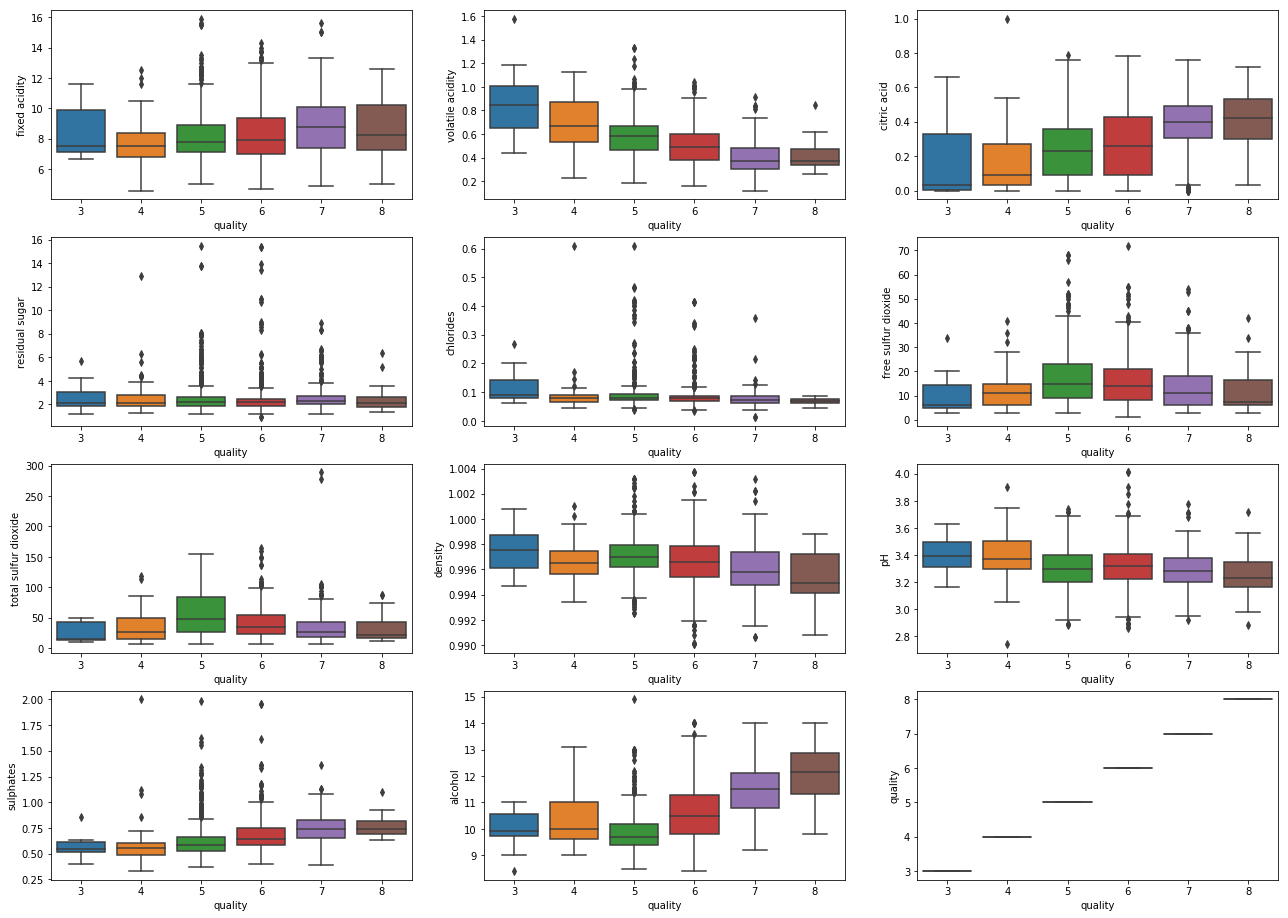

In [12]:
#Box Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"box")

<a class="anchor" id="5.2."></a> **Violin Plot** <=====>[İçindekiler Menüsüne Git](#0.)

Bir keman plotu, boxplot'taki kutuyu, veriler için bir çekirdek yoğunluk tahmini ile akıllıca değiştirir. Temelde aynı verileri gösterir, ancak yanlış yorumlama yapmayı engeller. Ayrıca, boxplot'tan daha zariftir.

Kaynak:https://www.kaggle.com/residentmario/plotting-with-seaborn

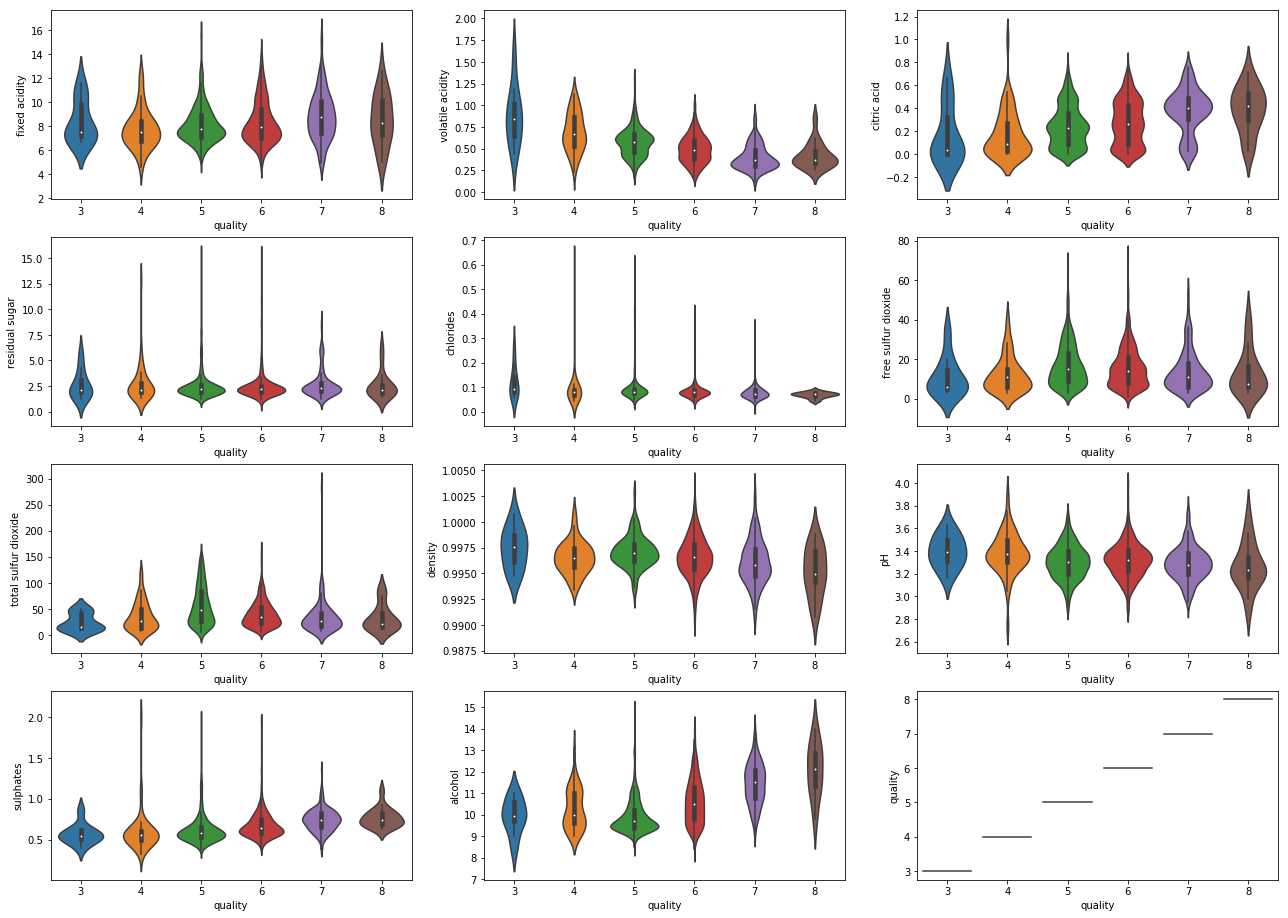

In [13]:
#Violin Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"violin")

<a class="anchor" id="5.3."></a> **Point Plot** <=====>[İçindekiler Menüsüne Git](#0.)

Bir nokta grafiği(point plot), dağılım diyagramı noktalarının konumuyla sayısal bir değişken için merkezi eğilimin bir tahminini temsil eder ve hata çubukları kullanarak bu tahminin etrafındaki belirsizliğin bir miktarını gösterir.

Nokta grafikleri, bir veya daha fazla kategorik değişkenin farklı seviyeleri arasındaki karşılaştırmaları odaklamak için çubuk çizimlerden(bar plor) daha kullanışlı olabilir. Bunlar etkileşimleri göstermede özellikle ustadır: Bir kategorik değişkenin seviyeleri arasındaki ilişkinin ikinci kategorik bir değişkenin seviyeleri arasında nasıl değiştiği. Her bir noktayı aynı renk tonundan birleştiren çizgiler, farklı nokta veya çubuk gruplarının yüksekliklerini karşılaştırmaktan ziyade, gözler için daha kolay olan eğimdeki farklılıklar tarafından değerlendirilmesine izin verir.

Bir nokta çiziminin sadece ortalama (ya da diğer tahmin edici) değerini gösterdiğini, ancak çoğu durumda kategorik değişkenlerin her düzeyindeki değerlerin dağılımını göstermek için daha bilgilendirici olabileceğini akılda tutmak önemlidir. Bu durumda, bir kutu veya keman grafikleri  gibi diğer yaklaşımlar daha uygun olabilir.

Kaynak:https://seaborn.pydata.org/generated/seaborn.pointplot.html

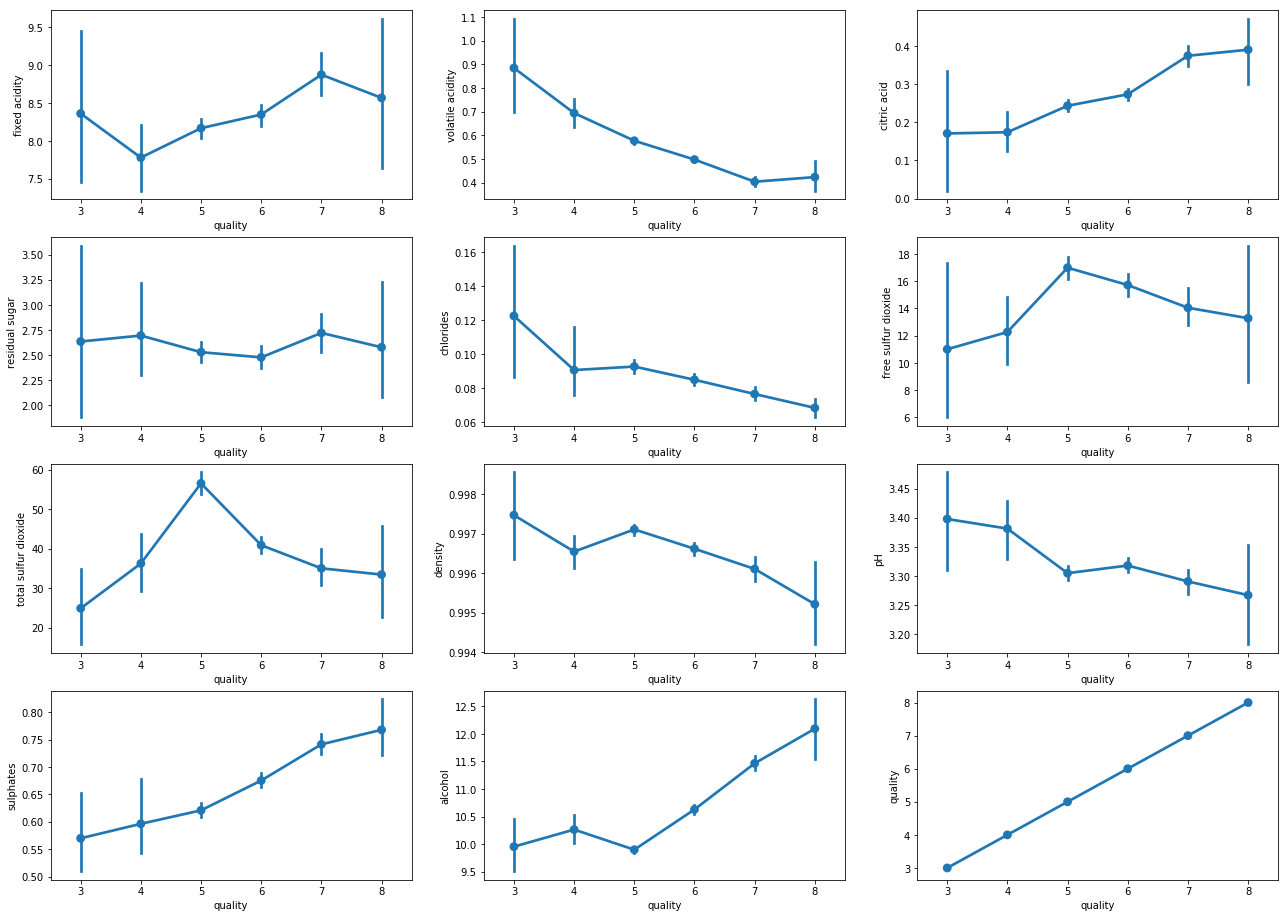

In [14]:
#Point Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"pointplot")


<a class="anchor" id="5.4."></a>**Barplot** <=====>[İçindekiler Menüsüne Git](#0.)

Dikdörtgen çubuk grafiği, nokta tahminleri ve güven aralıklarını gösteren bir grafik türüdür.

Çubuk grafiği, her bir dikdörtgenin yüksekliği ile sayısal bir değişken için  merkezi eğilim tahminini temsil eder ve hata çubuklarını kullanarak bu tahminin etrafındaki belirsizliğin  miktarını gösterir. Çubuk parseller kantitatif eksen aralığında 0 içerir ve niceliksel değişken için 0 anlamlı bir değer olduğunda iyi bir seçimdir ve ona karşı karşılaştırmalar yapılır.

0'ın anlamlı bir değer olmadığı veri kümeleri için,  nokta grafiği bir veya daha fazla kategorik değişkenin seviyeleri arasındaki farklara odaklanmanıza izin verecektir.

Çubuk çiziminin sadece ortalama (veya başka bir tahmin edici) değeri olduğunu akılda tutmak önemlidir, ancak çoğu durumda kategorik değişkenlerin her seviyesinde değer dağılımını göstermek daha bilgilendirici olabilir. Bu durumda, bir kutu veya keman grafikleri  gibi diğer yaklaşımlar daha uygun olabilir.

Kaynak: https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot

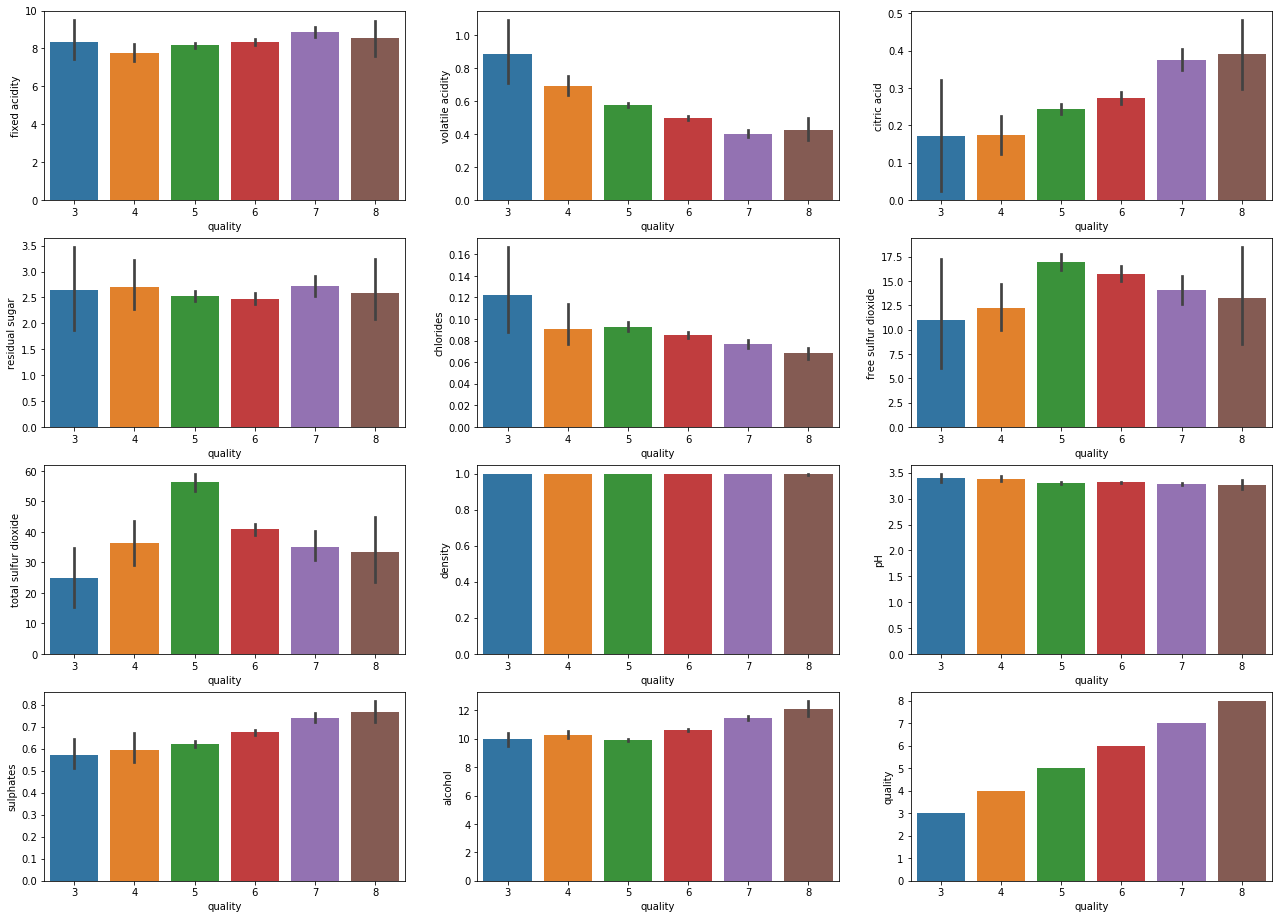

In [15]:
#Bar Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"bar")

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="6."></a>**6. Yardımcı Fonksiyonlar:get_models(), cross_validation_scores_for_various_ml_models(X_cv, y_cv)**

get_models() fonksiyonu kullanılmak istenen modellere geri dönmektedir

cross_validation_scores_for_various_ml_models(X_cv, y_cv) fonksiyonu var olan modeller için çapraz doğrulama sonucuna geri dönmektedir. 

In [16]:

def get_models():
    models=[]
    models.append(("LR",LogisticRegression()))
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    models.append(("SVM linear",SVC(kernel='linear')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    
    return models

def cross_validation_scores_for_various_ml_models(X_cv, y_cv):
    print("Çapraz Doğrulama Başarı Oranları".upper())
    models=get_models()


    results=[]
    names= []

    for name, model in models:
        kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=22)
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("{} modelinin çapraz doğrulaması yapıldı, başarı oranı:{:0.2f}".format(name, cv_result.mean()))

   

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="7."></a>**7. Altı Kalite Sevitesi İçin Çapraz Doğrulama Sonuçları** <=====>

In [17]:
dataset_temp=dataset.copy(deep=True)
X=dataset.drop('quality', axis=1)
y=dataset['quality']

X=StandardScaler().fit_transform(X)
cross_validation_scores_for_various_ml_models(X, y)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.58
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.56
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.58
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.63
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.62
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.57
LDA modelinin çapraz doğrulaması yapıldı, başarı oranı:0.59


[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="8."></a>**8. Yardımcı Fonksiyon:SVM_GridSearch(X_train, X_test, y_train, y_test)** 

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

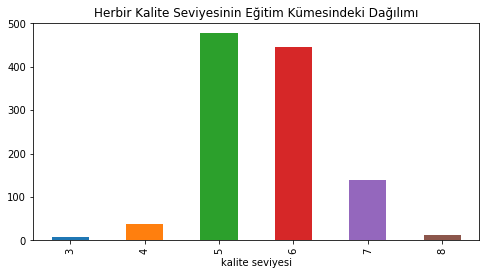

In [19]:
y_frame=pd.DataFrame()
y_frame['kalite seviyesi']=y_train
y_frame.groupby(['kalite seviyesi']).size().plot.bar(figsize=(8,4),
                                                     title="Herbir Kalite Seviyesinin Eğitim Kümesindeki Dağılımı")

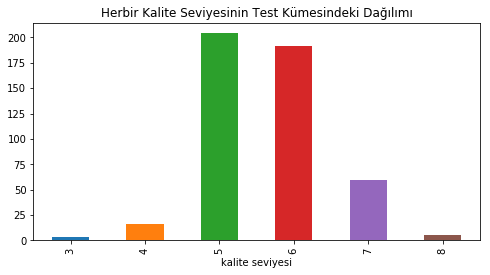

In [20]:
y_frame=pd.DataFrame()
y_frame['kalite seviyesi']=y_test
y_frame.groupby(['kalite seviyesi']).size().plot.bar(figsize=(8,4),title="Herbir Kalite Seviyesinin Test Kümesindeki Dağılımı")

In [21]:
def SVM_GridSearch(X_train, X_test, y_train, y_test):
    best_score=0
    gammas=[0.001, 0.01, 0.1, 1, 10, 100]
    Cs=[0.001, 0.01, 0.1, 1, 10, 100]
    
    for gamma in gammas:
        for C in Cs:
            svm=SVC(kernel='rbf',gamma=gamma, C=C)
            svm.fit(X_train, y_train)
            
            
            score=svm.score(X_test, y_test)
            
            if score>best_score:
                y_pred=svm.predict(X_test)
                best_score=score
                best_params={'C':C, 'gamma':gamma}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("classification reports:\n",classification_report(y_test, y_pred))

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="9."></a>**9. Altı Kalite Seviyesi İçin GridSearch Sonucu** 

In [22]:
SVM_GridSearch(X_train, X_test, y_train, y_test)

best score: 0.6416666666666667
best params: {'C': 1, 'gamma': 1}
classification reports:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.67      0.79      0.72       204
           6       0.60      0.68      0.64       192
           7       0.71      0.28      0.40        60
           8       0.00      0.00      0.00         5

    accuracy                           0.64       480
   macro avg       0.33      0.29      0.29       480
weighted avg       0.61      0.64      0.61       480



[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="10."></a>**10. Kalite Sayısını 3'e Düşürülmesi** 


In [23]:
dataset_temp.loc[(dataset_temp['quality']==3),'quality']=1
dataset_temp.loc[(dataset_temp['quality']==4),'quality']=1

dataset_temp.loc[(dataset_temp['quality']==5),'quality']=2
dataset_temp.loc[(dataset_temp['quality']==6),'quality']=2

dataset_temp.loc[(dataset_temp['quality']==7),'quality']=3
dataset_temp.loc[(dataset_temp['quality']==8),'quality']=3

In [24]:
dataset_temp['quality'].value_counts()

2    1319
3     217
1      63
Name: quality, dtype: int64

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="11."></a>**11. Üç Kalite Seviyesi İçin Kalite-Özellik İlişkileri**  

<a class="anchor" id="11.1."></a>**Box Plot** <=====>[İçindekiler Menüsüne Git](#0.)

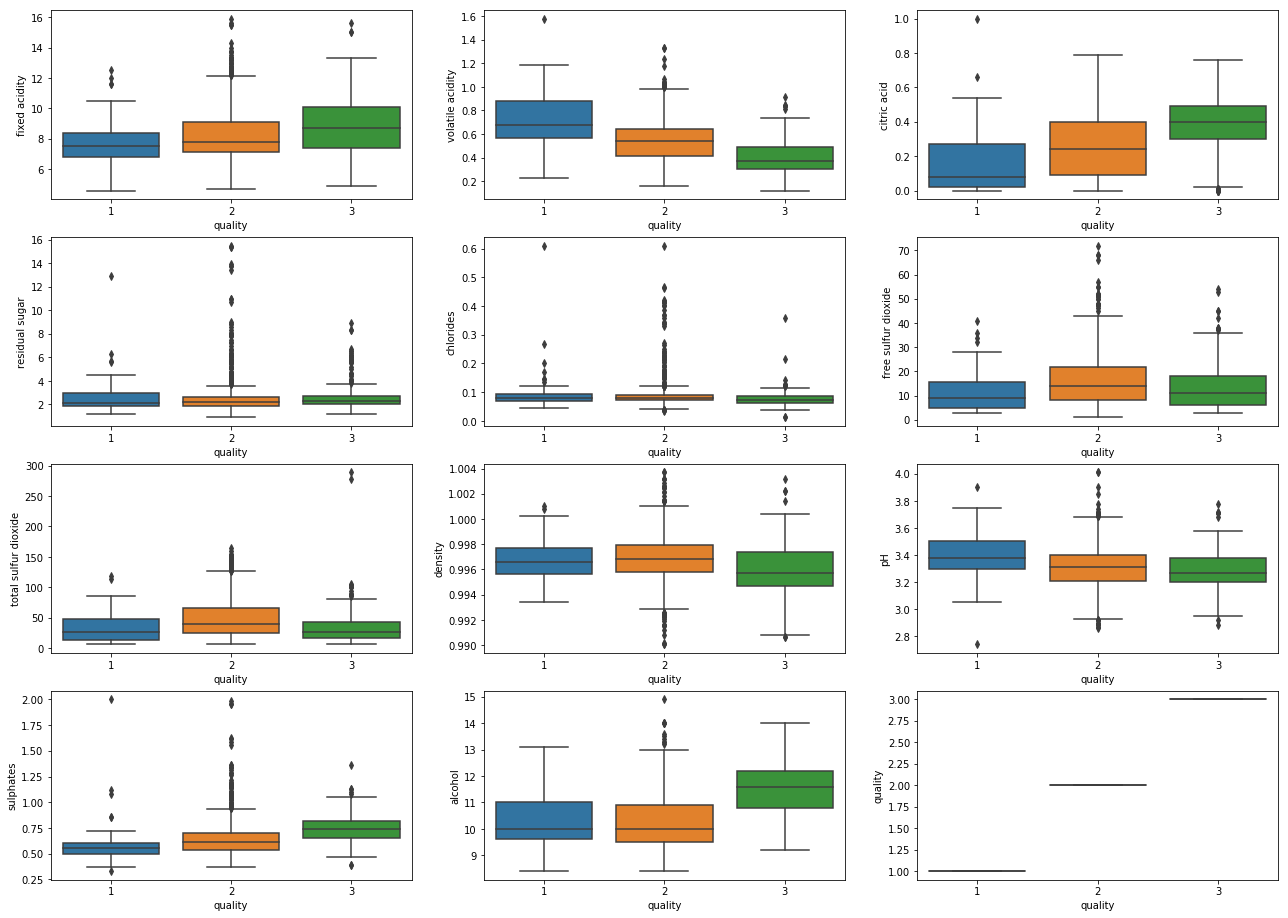

In [25]:
#Box Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"box")

<a class="anchor" id="11.2."></a>**Violin Plot** <=====>[İçindekiler Menüsüne Git](#0.)

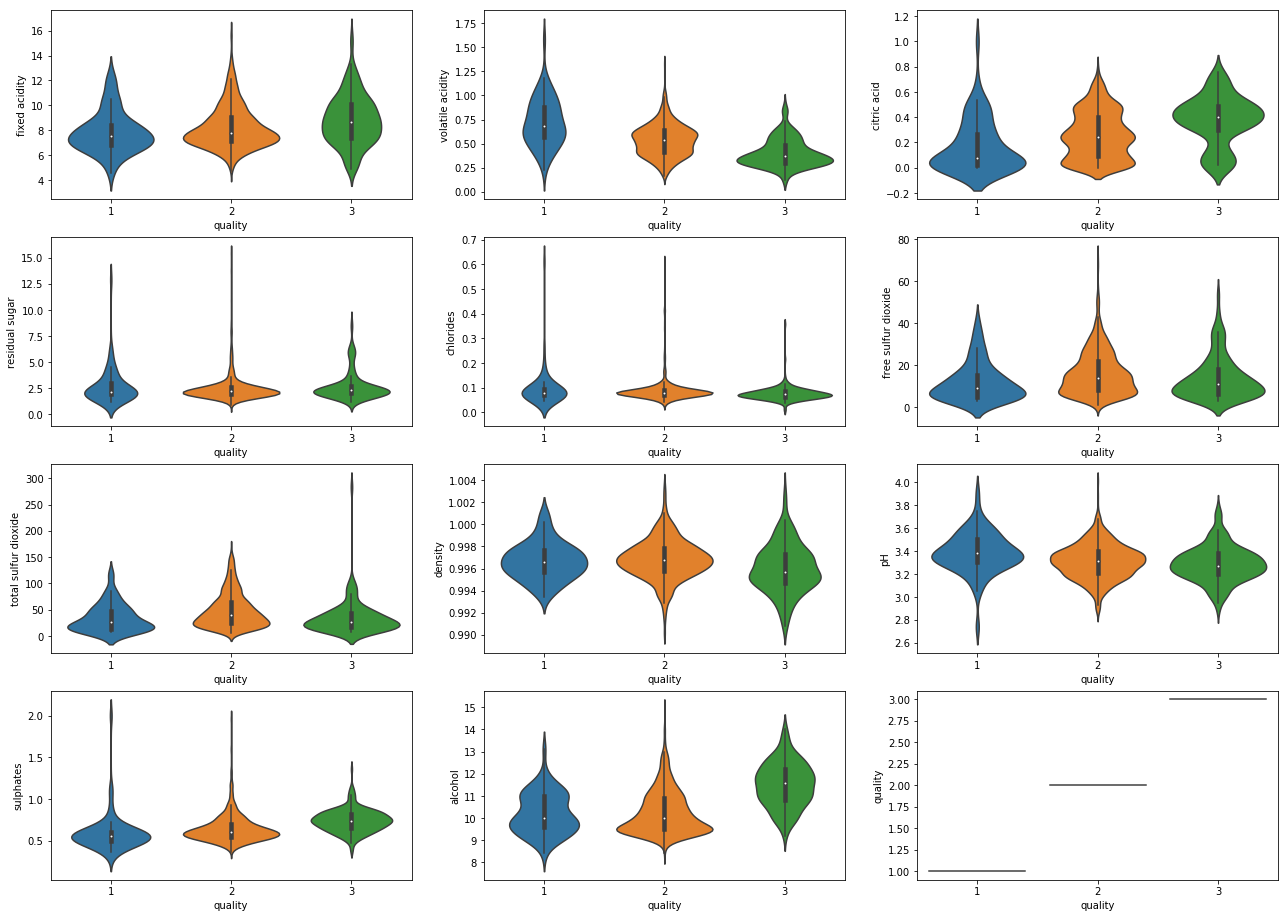

In [26]:
#Violin Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"violin")

<a class="anchor" id="11.3."></a>**Point Plot** <=====>[İçindekiler Menüsüne Git](#0.)

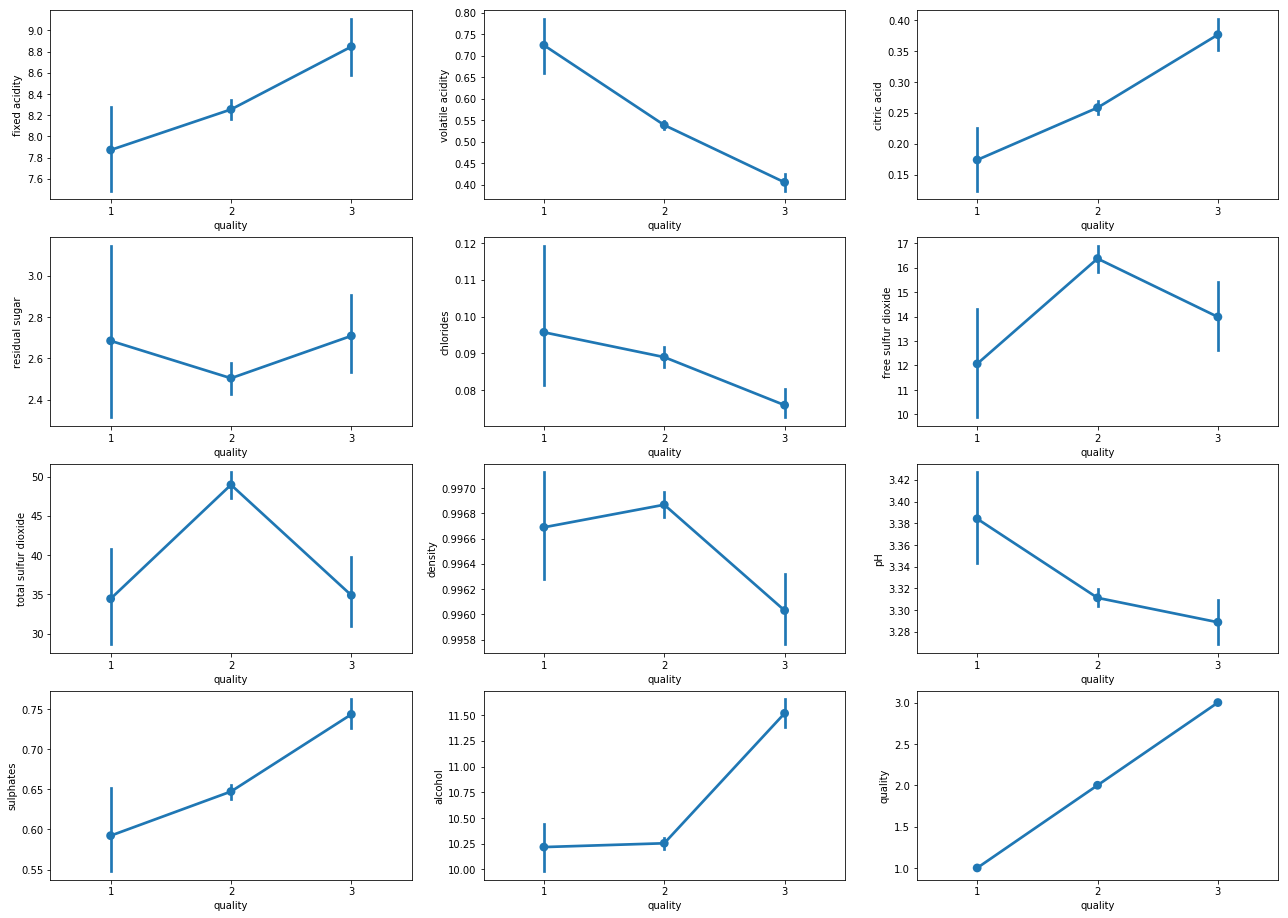

In [27]:
#Point Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"point")

<a class="anchor" id="11.4."></a>**Bar Plot** <=====>[İçindekiler Menüsüne Git](#0.)

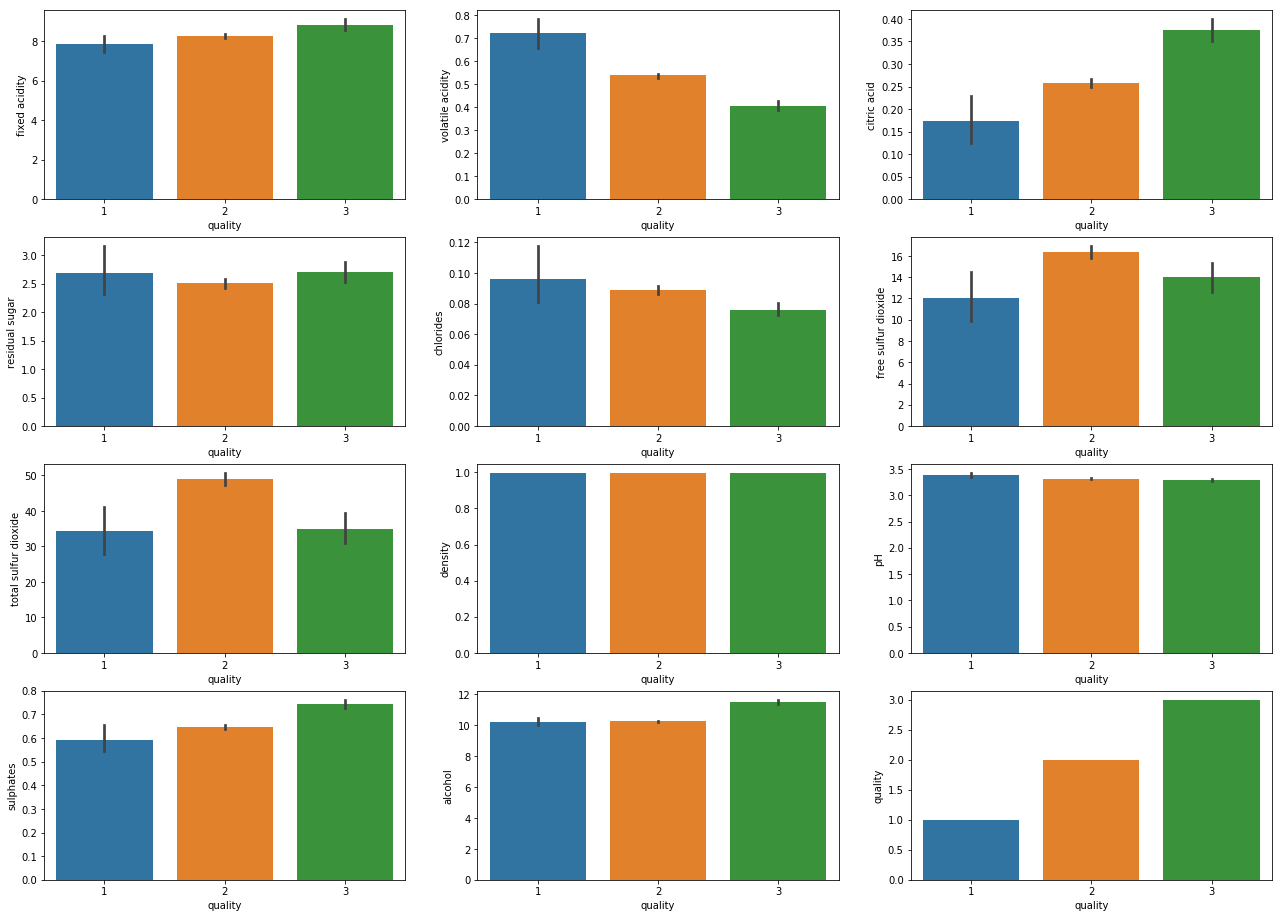

In [28]:
#Bar Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"bar")

[İçindekiler Menüsüne Git](#0.)

# <a class="anchor" id="12."></a>**12. Üç Kalite Sevitesi İçin Çapraz Doğrulama Sonuçları** <=====>

In [29]:
X_temp=dataset_temp.drop('quality', axis=1)
y_temp=dataset_temp['quality']
X_temp=StandardScaler().fit_transform(X_temp)

X_train_temp, X_test_temp, y_train_temp, y_test_temp=train_test_split(X_temp, 
                                                                      y_temp,
                                                                      stratify=y_temp,
                                                                      test_size=0.3,
                                                                      random_state=42)


cross_validation_scores_for_various_ml_models(X_temp, y_temp)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.84
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.78
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.82
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.85
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83
LDA modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83


<a class="anchor" id="13."></a>**Üç Kalite Seviyesi İçin GridSearch Sonucu** <=====>[İçindekiler Menüsüne Git](#0.)

In [30]:
SVM_GridSearch(X_train_temp, X_test_temp, y_train_temp, y_test_temp)

best score: 0.8625
best params: {'C': 1, 'gamma': 1}
classification reports:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.87      0.98      0.92       396
           3       0.80      0.37      0.51        65

    accuracy                           0.86       480
   macro avg       0.56      0.45      0.48       480
weighted avg       0.82      0.86      0.83       480



In [31]:


print('Az örnekleri çoğaltmadan önce')
print('X_train_temp.shape:', X_train_temp.shape)
print('y_train_temp.shape:', y_train_temp.shape)
smote = SMOTE()
X_train_temp, y_train_temp = smote.fit_resample(X_train_temp, y_train_temp)
print('Az örnekleri çoğalttıktan sonra')
print('X_train_temp.shape:', X_train_temp.shape)
print('y_train_temp.shape:', y_train_temp.shape)

SVM_GridSearch(X_train_temp, X_test_temp, y_train_temp, y_test_temp)

Az örnekleri çoğaltmadan önce
X_train_temp.shape: (1119, 11)
y_train_temp.shape: (1119,)
Az örnekleri çoğalttıktan sonra
X_train_temp.shape: (2769, 11)
y_train_temp.shape: (2769,)
best score: 0.8604166666666667
best params: {'C': 10, 'gamma': 10}
classification reports:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.86      1.00      0.92       396
           3       0.95      0.28      0.43        65

    accuracy                           0.86       480
   macro avg       0.60      0.42      0.45       480
weighted avg       0.84      0.86      0.82       480

